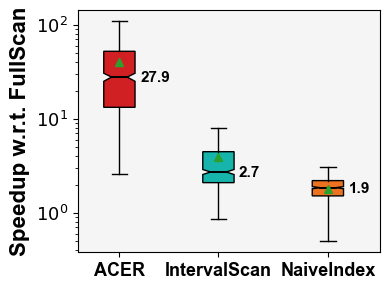

In [2]:
"""
箱形图各要素含义如下:

     Q1-1.5IQR     Q1    median  Q3      Q3+1.5IQR
                    |------:------|
*   *   |-----------|      :      |---------|            * *
                    |------:------|
flier               <-----IQR----->                     flier 
"""

import matplotlib.pyplot as plt
import numpy as np

titile_font = {'family':'Arial', 'weight': 'bold', 'size': 16}
legende_font = {'family':'Arial', 'weight': 'bold', 'size': 13}
xticks_font  = {'family':'Arial', 'weight': 'bold', 'size': 13}
value_font   = {'family':'Arial', 'weight': 'bold', 'size': 11}
yticks_fontsize=13
colors = ['#d12023','#17b4ac', '#ed721f'] # , '#865f0c'

# read query cost
def read_query_cost(filename):
    query_cost = []
    with open(filename) as file:
        for line in file:
            if line.find("query cost") != -1:
                words = line.split(" ")
                time = words[-1]
                read_value = float(time[0:-4])
                if read_value == 0.0:
                    query_cost.append(0.1)
                else:
                    query_cost.append(read_value)
    return query_cost

acer = read_query_cost('nasdaq_acer_Y1_Y2_A3.txt')
interval_scan = read_query_cost('nasdaq_interval_scan_Y1_Y2_A3.txt')
naive_index = read_query_cost('nasdaq_naive_index_Y1_Y2_A3.txt')
fullscan = read_query_cost('nasdaq_full_scan_Y1_Y2_A3.txt')

acer_speedup = []
interval_scan_speedup = []
naive_index_speedup = []

for i in range(len(acer)):
    acer_speedup.append(fullscan[i] / acer[i])
    interval_scan_speedup.append(fullscan[i] / interval_scan[i])
    naive_index_speedup.append(fullscan[i] / naive_index[i])

# median1 = np.median(acer_speedup)
# print(f"acer median: {median1}")

fig, ax = plt.subplots(figsize= (4, 3))
ax.set_facecolor('#F5F5F5')
plt.xlim(0.6, 3.5)

x_positions = (1, 1.95, 3)

# 绘制箱形图,这里参数比较多，挑选一些关键参数讲解
# 【notch】是绘制凹口箱线图（True），还是绘制矩形箱线图（False）
# 【patch_artist】如果为False，则使用Line2维生成长方体，必须要加上True
# 【showfliers】如果为False，则不显示异常值，数据偏差很大时，建议关掉
# 【showcaps】是否显示箱型图顶端和末端的两条线,默认是显示
# 【medianprops】设置中位数线的属性,类型等
# 【medianprops】盒子的宽度。默认值为0.5或0.15,可以修改widths=[0.7, 0.7, 0.7]
# 【showmeans】是否显示平均数，一般而言只会显示中位数，如果要显示平均数需要加上
box_fig = ax.boxplot([acer_speedup, interval_scan_speedup, naive_index_speedup], 
                     medianprops={'linewidth': 1.45, 'color': 'black'}, 
                     notch=True, showfliers=False,
                     positions=x_positions,
                     patch_artist=True,
                     showmeans=True)

for patch, color in zip(box_fig['boxes'], colors):
    patch.set_facecolor(color)

medians = [median.get_ydata()[0] for median in box_fig['medians']]

y_positions = [23, 2.25, 1.5]
idx = 0
for median, x_pos in zip(medians, [1.35, 2.25, 3.3]):
    ax.text(x_pos, y_positions[idx], f'{median:.1f}', ha='center', va='bottom', fontdict=value_font)
    idx = idx + 1

ax.tick_params(labelsize=yticks_fontsize)
# ax.set_xlabel('Index-based Methods', titile_font)
ax.set_ylabel('Speedup w.r.t. FullScan', titile_font)
ax.set_xticklabels(['ACER', 'IntervalScan', 'NaiveIndex'], fontdict=xticks_font)
ax.set_yscale('log')

plt.tight_layout()
plt.savefig(fname='test.pdf', dpi=800)
plt.show()